In [1]:
import numpy as np
import matplotlib.pyplot as plt

from AvantgardeModelUtils import *

file_uniform = "../data/control/agent_data_uni.csv"
data = LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal"])

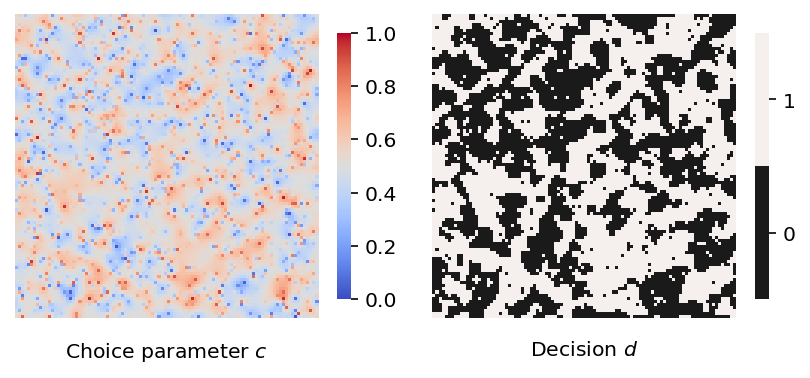

In [2]:
ShowState(Grid(Choice(data, 2000)))

In [4]:
attitudes = np.genfromtxt('../data/uniform/data_A_seed100.csv', delimiter=' ')

In [18]:
attitudes[230] - data.query("step == 500")["affinity"].values

array([0., 0., 0., ..., 0., 0., 0.])

In [6]:
def IndexToCoords(index, Nx):
    coords = np.zeros(2, dtype='int32')
    coords[1] = int(index % Nx)
    coords[0] = int(index / Nx)
    return coords

def CoordsToIndex(coords, Nx):
    return int(coords[0] * Nx + coords[1])

def neighbours_idx(Nx, idx):
    rowNeighbours = [-1, -1, -1, 0, 0, 1, 1, 1]
    columnNeighbours = [-1, 0, 1, -1, 1, -1, 0, 1]
    
    coords = IndexToCoords(idx, Nx)
    nn_idx = []
    for r, c in zip(rowNeighbours, columnNeighbours):
        index = CoordsToIndex((coords + np.array([r, c])) % Nx, Nx)
        nn_idx.append(index)
    return nn_idx

neighbours_idx(10, 12)

[1, 2, 3, 11, 13, 21, 22, 23]

In [60]:
# correlation
sample = data.query("step == 1000")
A = sample["affinity"].values
Annm = np.array([A[neighbours_idx(100, j)].mean() for j in range(A.size)])
np.corrcoef(A-np.mean(A), sample["avantgarde"].values * sample["affinityGoal"].values)

array([[1.        , 0.42360708],
       [0.42360708, 1.        ]])

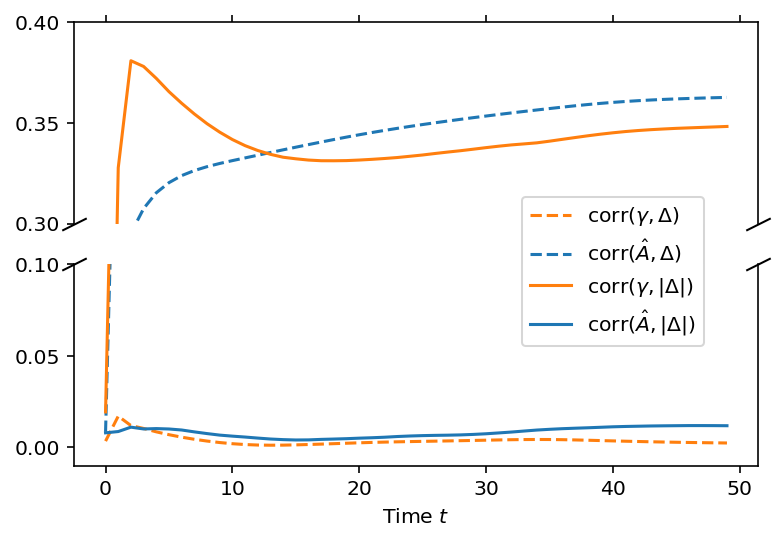

In [136]:
gamma = data.query("step == 0")["avantgarde"].values
ahat = data.query("step == 0")["affinityGoal"].values


kk = np.arange(0, 50, 1)
gamma_delta_corr = [abs(np.corrcoef(gamma, attitudes[k] - np.mean(attitudes[k]))[0,1]) for k in kk]
ahat_delta_corr = [abs(np.corrcoef(ahat, attitudes[k] - np.mean(attitudes[k]))[0,1]) for k in kk]
gamma_delta_abs_corr = [abs(np.corrcoef(gamma, np.abs(attitudes[k] - np.mean(attitudes[k])))[0,1]) for k in kk]
ahat_delta_abs_corr = [abs(np.corrcoef(ahat, np.abs(attitudes[k] - np.mean(attitudes[k])))[0,1]) for k in kk]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(kk, gamma_delta_corr, linestyle="--", color="tab:orange",)
ax1.plot(kk, ahat_delta_corr, linestyle="--", color="tab:blue")
ax1.plot(kk, gamma_delta_abs_corr, linestyle="-", color="tab:orange")
ax1.plot(kk, ahat_delta_abs_corr, linestyle="-", color="tab:blue")

ax2.plot(kk, gamma_delta_corr, linestyle="--", color="tab:orange", label="$\operatorname{corr}(\gamma, \Delta)$")
ax2.plot(kk, ahat_delta_corr, linestyle="--", color="tab:blue", label="$\operatorname{corr}(\hat{A}, \Delta)$")
ax2.plot(kk, gamma_delta_abs_corr, linestyle="-", color="tab:orange", label="$\operatorname{corr}(\gamma, \|\Delta\|)$")
ax2.plot(kk, ahat_delta_abs_corr, linestyle="-", color="tab:blue", label="$\operatorname{corr}(\hat{A}, \|\Delta\|)$")

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.3, 0.4)  # outliers only
ax2.set_ylim(-0.01, .1)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.xlabel(r"Time $t$")

fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.6))

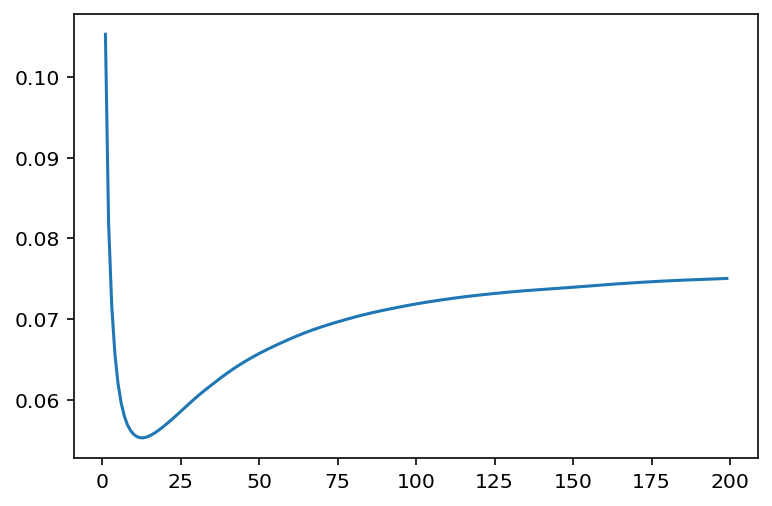

In [129]:
plt.plot(np.arange(1, 200, 1), [np.mean(np.abs(attitudes[k] - np.mean(attitudes[k]))) for k in np.arange(1, 200, 1)])

In [10]:
attitudes = np.genfromtxt('../data/control/agent_details_select_uni.csv', delimiter=' ')

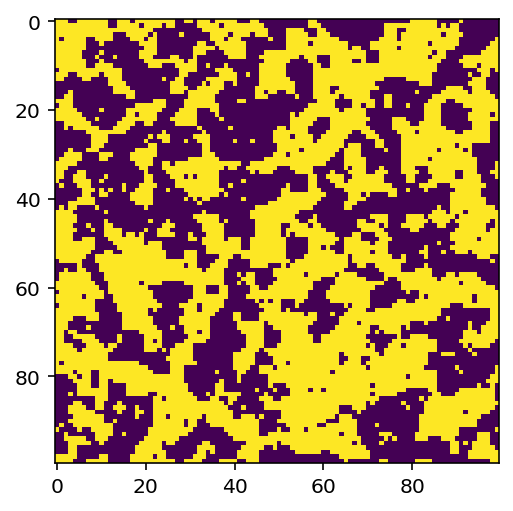

In [21]:
plt.imshow(attitudes[300].reshape(100, 100) > 0.5)

In [4]:
attitudes = np.genfromtxt('../data/control/agent_details_select_uni.csv', delimiter=' ')
steps = np.arange(7500, attitudes.shape[0] + 7500)

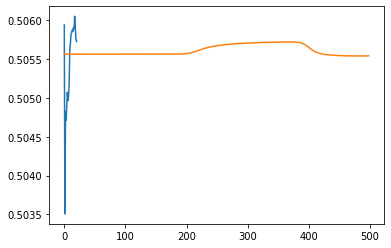

In [5]:
plt.figure()

plt.plot(data.groupby("step").mean().get("affinity").values)
plt.plot(attitudes.mean(axis=1))

plt.show()

In [171]:
import os
import re
import pandas as pd

uniform_files = [f for f in os.listdir("../data/size") if "agent_data_s" in f]
m3_files = [f for f in os.listdir("../data/size") if "agent_data_beta_m-3" in f]
m7_files = [f for f in os.listdir("../data/size") if "agent_data_beta_m-7" in f]
m5_files = [f for f in os.listdir("../data/size") if "agent_data_beta_m-5" in f]

def get_size_relaxtime(files):
    s = [int(re.search(r'N-(\d+)', f).group(1)) for f in files if re.search(r'N-(\d+)', f)]
    r = [int(re.search(r'step-(\d+)', f).group(1)) for f in files if re.search(r'step-(\d+)', f)]
    seed = [int(re.search(r's-(\d+)', f).group(1)) for f in files if re.search(r'step-(\d+)', f)]
    return pd.DataFrame({'size': s, 'relaxtime': r, 'seed': seed})

df1 = get_size_relaxtime(uniform_files)
df2 = get_size_relaxtime(m3_files)
df3 = get_size_relaxtime(m5_files)
df4 = get_size_relaxtime(m7_files)

#plt.plot(s, r, "x")

#data = LoadSimulation("../data/size/agent_data_N-100_step-761.csv")
#aa = data.get("affinity").values

def density_of_interfaces(array):
    return np.logical_xor(array[index_mapping] >= 0.5, np.tile(array >= 0.5, (8,1)).transpose()).sum() / (8 * array.size)

#rho = density_of_interfaces(aa)
#print(rho)
#plt.imshow(aa.reshape((100, 100))>=0.5, cmap="bwr")#

In [173]:
df2

,size,relaxtime,seed
0,100,689,100
1,120,481,100
2,140,540,100
3,160,443,100
4,20,185,100
...,...,...,...
279,40,343,137
280,60,288,137
281,80,529,137
282,20,179,138


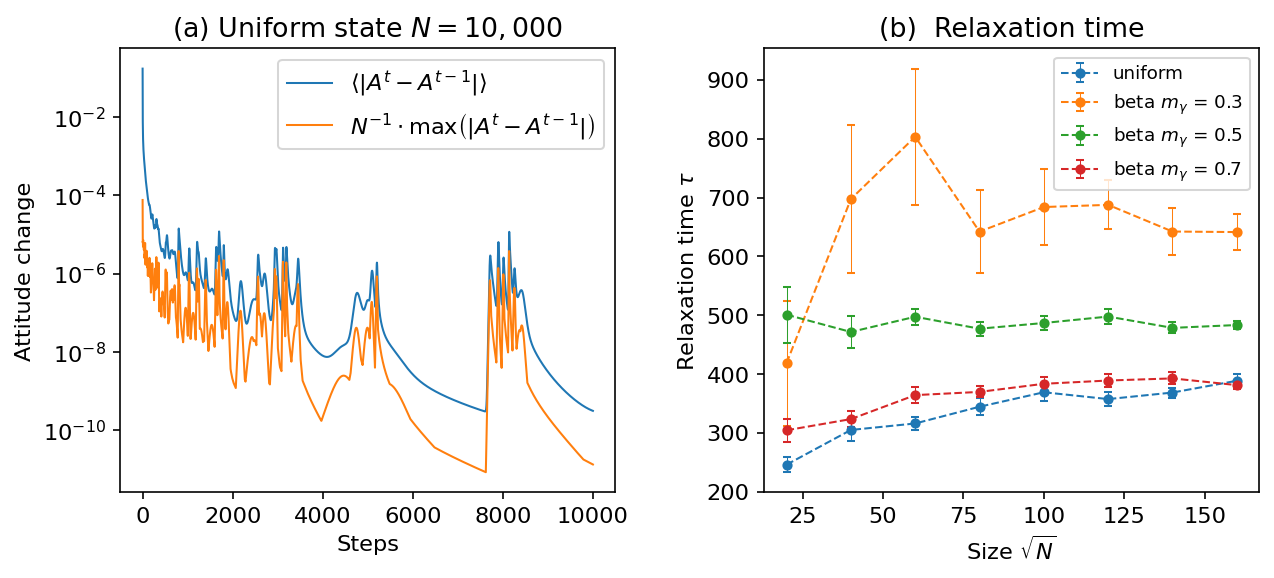

In [172]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.dpi": 147, "lines.linewidth": 1.})

# Read in data from text file
data = np.genfromtxt('../data/affinity_change_seed100.txt', delimiter=' ')
data2 = np.genfromtxt('../data/control/affinity100.txt', delimiter=' ')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

start = 0
step = 1
end = 10000
n_agents = 10000

# Plot data with error bars
#plt.plot(data[start:end:step, 0], data[start:end:step, 1] / n_agents)

ax1.plot(data2[start:end:step, 0], data2[start:end:step, 1] / n_agents, 
         label=r'$\langle \| A^{t} - A^{t-1} \| \rangle$')
ax1.plot(data2[start:end:step, 0], data2[start:end:step, 3] / (n_agents), 
        label=r'$N^{-1} \cdot \max \left( \| A^{t} - A^{t-1} \| \right)$')
#plt.plot(data2[start:end:step, 0], data2[start:end:step, 4])

ax1.set_yscale("log")
# Add axis labels and title
ax1.set_xlabel('Steps')
ax1.set_ylabel("Attitude change")
ax1.legend()

#plt.ylim([-1e-5, 1e-4])


grouped = df1.groupby("size")["relaxtime"]
agg_data = grouped.agg([np.mean, np.std])

style = {"ms": 4, "capsize": 2, "elinewidth": 0.5}
ax2.errorbar(agg_data.index, agg_data["mean"].values, yerr=agg_data["std"] / np.sqrt(20), 
             marker="o", linestyle="--", **style, label=r"uniform")

grouped = df2.groupby("size")["relaxtime"]
agg_data = grouped.agg([np.mean, np.std])

style = {"ms": 4, "capsize": 2, "elinewidth": 0.5}
ax2.errorbar(agg_data.index, agg_data["mean"].values, yerr=agg_data["std"] / np.sqrt(20), 
             marker="o", linestyle="--", **style, label=r"beta $m_{\gamma}$ = 0.3")

grouped = df3.groupby("size")["relaxtime"]
agg_data = grouped.agg([np.mean, np.std])

style = {"ms": 4, "capsize": 2, "elinewidth": 0.5}
ax2.errorbar(agg_data.index, agg_data["mean"].values, yerr=agg_data["std"] / np.sqrt(20), 
             marker="o", linestyle="--", **style, label=r"beta $m_{\gamma}$ = 0.5")

grouped = df4.groupby("size")["relaxtime"]
agg_data = grouped.agg([np.mean, np.std])

style = {"ms": 4, "capsize": 2, "elinewidth": 0.5}
ax2.errorbar(agg_data.index, agg_data["mean"].values, yerr=agg_data["std"] / np.sqrt(20), 
             marker="o", linestyle="--", **style, label=r"beta $m_{\gamma}$ = 0.7")

ax2.set_ylabel(r"Relaxation time $\tau$")#
ax2.set_xlabel(r"Size $\sqrt{N}$")

ax2.legend(fontsize=9)

plt.subplots_adjust(wspace = 0.3)

ax1.set_title(r"(a) Uniform state $N=10,000$")
ax2.set_title("(b)  Relaxation time")
plt.show()

In [125]:

def rho_from_file(file):
    data = LoadSimulation(os.path.join("../data/size", file))
    aa = data.get("affinity").values
    rho = density_of_interfaces(aa)
    return rho

def get_rho_size(files):
    s = [int(re.search(r'N-(\d+)', f).group(1)) for f in files if re.search(r'N-(\d+)', f)]
    r = [int(re.search(r'step-(\d+)', f).group(1)) for f in files if re.search(r'step-(\d+)', f)]
    seed = [int(re.search(r's-(\d+)', f).group(1)) for f in files if re.search(r'step-(\d+)', f)]
    rho = [rho_from_file(f) for f in files]
    return pd.DataFrame({'size': s, 'relaxtime': r, 'seed': seed, "rho": rho})

def density_of_interfaces(array):
    index_mapping = np.array([map_index_to_neighbours(k, int(np.sqrt(array.size))) for k in range(array.size)])
    return np.logical_xor(array[index_mapping] >= 0.5, np.tile(array >= 0.5, (8,1)).transpose()).sum() / (8 * array.size)

df = get_rho_size(uniform_files)

<ErrorbarContainer object of 3 artists>

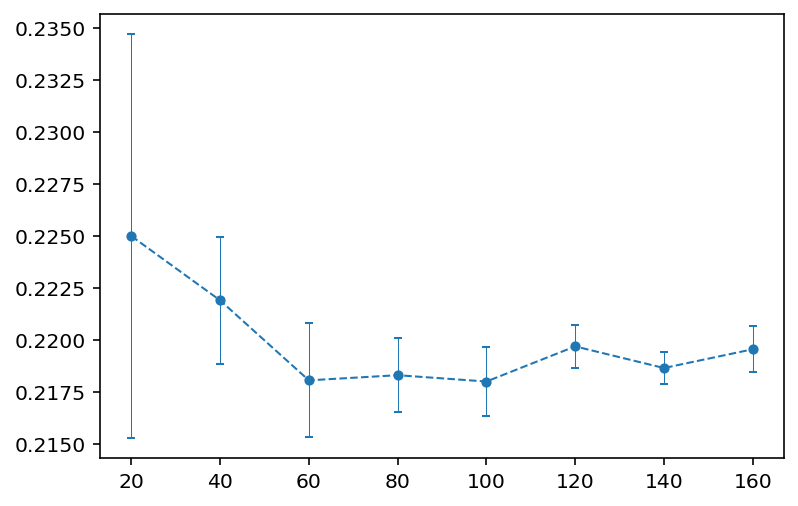

In [129]:
grouped = df.groupby("size")["rho"]
agg_data = grouped.agg([np.mean, np.std])

style = {"ms": 4, "capsize": 2, "elinewidth": 0.5}
plt.errorbar(agg_data.index, agg_data["mean"].values, yerr=agg_data["std"] / np.sqrt(10), 
             marker="o", linestyle="--", **style)


In [88]:
c = 12
m = 0.3
1 + (c-2) * m, 1 + (c-2) * (1-m)

(4.0, 8.0)

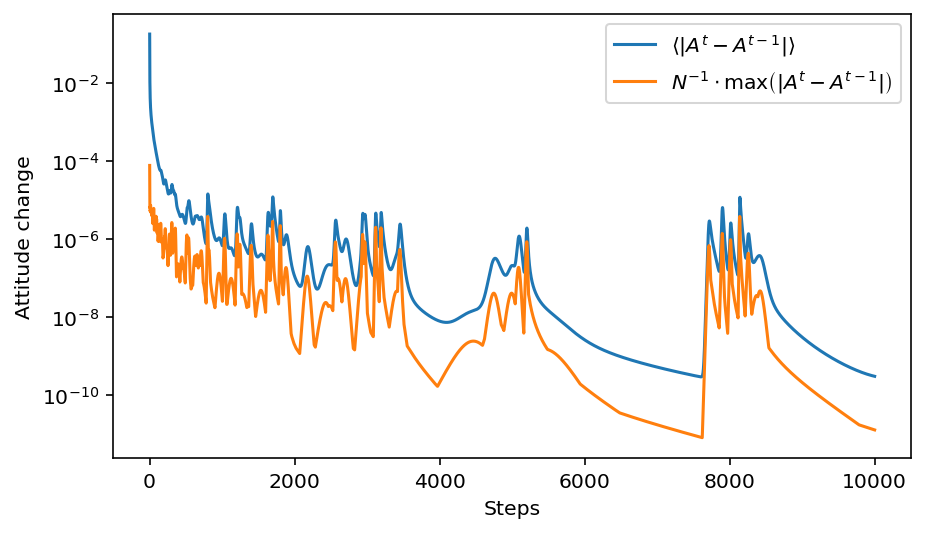

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.dpi": 147})

# Read in data from text file
data = np.genfromtxt('../data/affinity_change_seed100.txt', delimiter=' ')
data2 = np.genfromtxt('../data/control/affinity100.txt', delimiter=' ')

plt.figure(figsize=(7,4))

start = 0
step = 1
end = 10000
n_agents = 10000

# Plot data with error bars
#plt.plot(data[start:end:step, 0], data[start:end:step, 1] / n_agents)

plt.plot(data2[start:end:step, 0], data2[start:end:step, 1] / n_agents, 
         label=r'$\langle \| A^{t} - A^{t-1} \| \rangle$')
plt.plot(data2[start:end:step, 0], data2[start:end:step, 3] / (n_agents), 
        label=r'$N^{-1} \cdot \max \left( \| A^{t} - A^{t-1} \| \right)$')
#plt.plot(data2[start:end:step, 0], data2[start:end:step, 4])

plt.gca().set_yscale("log")
# Add axis labels and title
plt.xlabel('Steps')
plt.ylabel("Attitude change")
plt.legend()

#plt.ylim([-1e-5, 1e-4])

# Show plot
plt.show()


In [89]:
attitudes = np.genfromtxt('../data/affinity100.txt', delimiter=' ')
steps = attitudes[:, 0]
attitudes = attitudes[:, 1:]

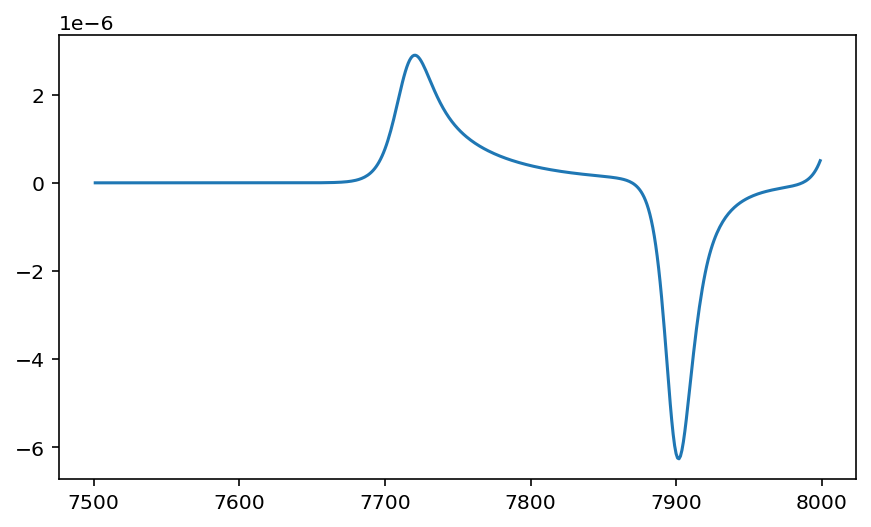

In [49]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.dpi": 147})

# Read in data from text file
data = np.genfromtxt('../data/affinity_change_micro_seed100.txt', delimiter=' ')

steps = data[:, 0]
data = data[:, 1:]

plt.figure(figsize=(7,4))

n_agents = 10000

# Plot data with error bars
#plt.errorbar(data[start:end:step, 0], data[start:end:step, 1] / n_agents, 
#             fmt='-')

plt.plot(steps, attitudes.mean(axis=1))

# Add axis labels and title
#plt.xlabel('Steps')
#plt.ylabel(r'$\langle \| A^{t} - A^{t-1} \| \rangle$')

#plt.ylim([-1e-7, 1e-5])

# Show plot
plt.show()


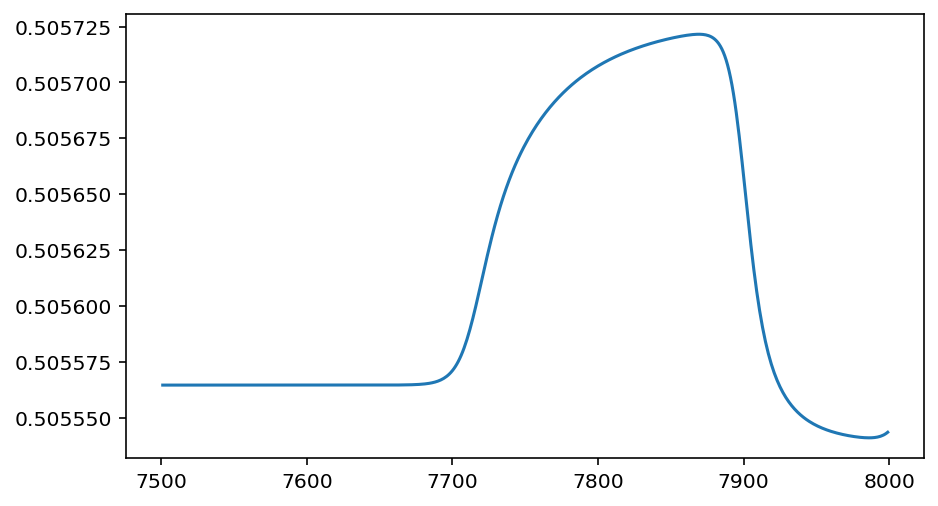

In [88]:
plt.figure(figsize=(7,4))

n_agents = 10000

# Plot data with error bars
#plt.errorbar(data[start:end:step, 0], data[start:end:step, 1] / n_agents, 
#             fmt='-')

plt.plot(steps, attitudes.mean(axis=1))

# Add axis labels and title
#plt.xlabel('Steps')
#plt.ylabel(r'$\langle \| A^{t} - A^{t-1} \| \rangle$')

#plt.ylim([-1e-7, 1e-5])

# Show plot
plt.show()


<AxesSubplot:>

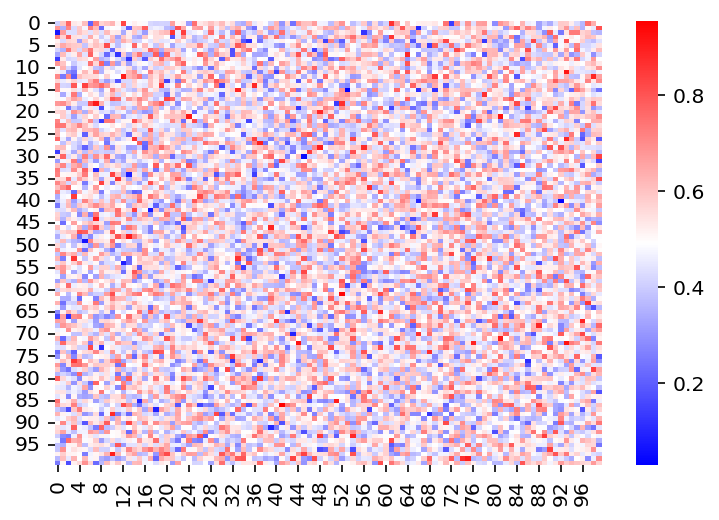

In [98]:
da_grid = attitudes[0].reshape(100, 100)

import seaborn as sns

sns.heatmap(da_grid, cmap="bwr")

In [75]:
rel_att = attitudes - attitudes[0]

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from AvantgardeModelUtils import *

file_uniform = "../data/control/agent_data_uni.csv"
data = LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal"])

In [13]:
eq_data = data.query("step == 2_000")
A = eq_data["affinity"].values
Annm = np.array([A[neighbours_idx(100, j)].mean() for j in range(A.size)])
eq_delta = Annm - A
Ahat = eq_data["affinityGoal"].values
gamma = eq_data["avantgarde"].values
gamma_term = (1-gamma) / gamma * np.sign(eq_delta)
eq_d2 = A - Ahat - gamma_term

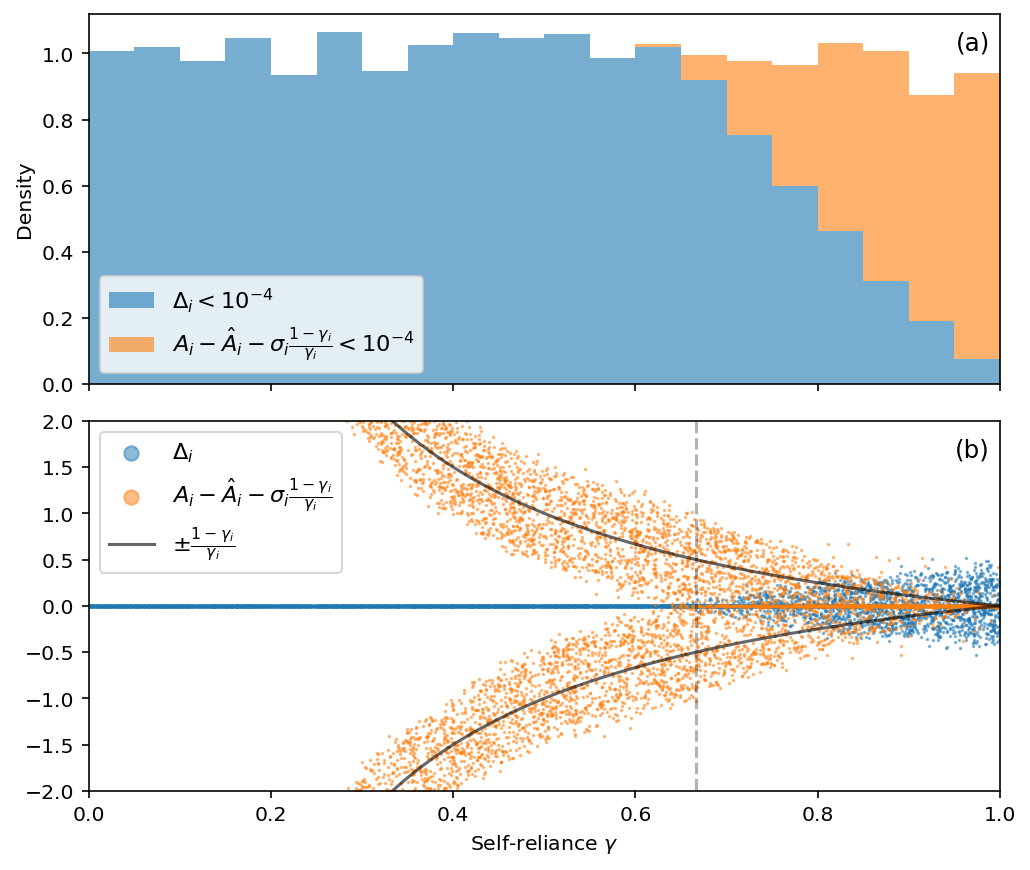

In [11]:
# visualize
###########
plt.rcParams.update({"figure.dpi": 147})
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 7), sharex=True)

# scatter
ax2.scatter(gamma, eq_delta, marker="o", s=0.5, alpha=0.5, label=r"$\Delta_i$")
ax2.scatter(gamma, eq_d2, marker="o", s=0.5, alpha=0.5, label=r"$A_i - \hat{A}_i - \sigma_i \frac{1-\gamma_i}{\gamma_i}$")
ax2.plot([2/3, 2/3], [-5, 5], color="black", linestyle="--", alpha=0.3)

x = np.linspace(0.1, 1.0, 100)
ax2.plot(x, (1-x)/x, color="black", alpha=0.6, label=r"$\pm \frac{1-\gamma_i}{\gamma_i}$")
ax2.plot(x, -(1-x)/x, color="black", alpha=0.6)
ax2.set_ylim([-2, 2])

ax2.legend(fontsize=11, markerscale=10)
ax2.set_xlabel(r"Self-reliance $\gamma$")
ax2.set_ylabel(r"")
ax2.set_xlim([0, 1])

# histogram
c1 = np.abs(eq_delta) < 1e-3
c2 = np.abs(eq_d2) < 1e-3
c3 = np.logical_not(np.logical_or(c1, c2))

bins = np.linspace(0, 1, 21)
ax1.hist([gamma[c1], gamma[c2]], histtype="bar", density=True, stacked=True, bins=bins, alpha=0.6, 
     label=[r"$\Delta_i < 10^{-4}$", r"$A_i - \hat{A}_i - \sigma_i \frac{1-\gamma_i}{\gamma_i} < 10^{-4}$"])

ax1.legend(fontsize=11, loc="lower left")
ax1.set_ylabel("Density")
#ax1.set_xlabel(r"Self-reliance $\gamma$")

ax1.set_title("(a)", x=0.97, y=.87)
ax2.set_title("(b)", x=0.97, y=0.87)

plt.subplots_adjust(hspace=0.1)

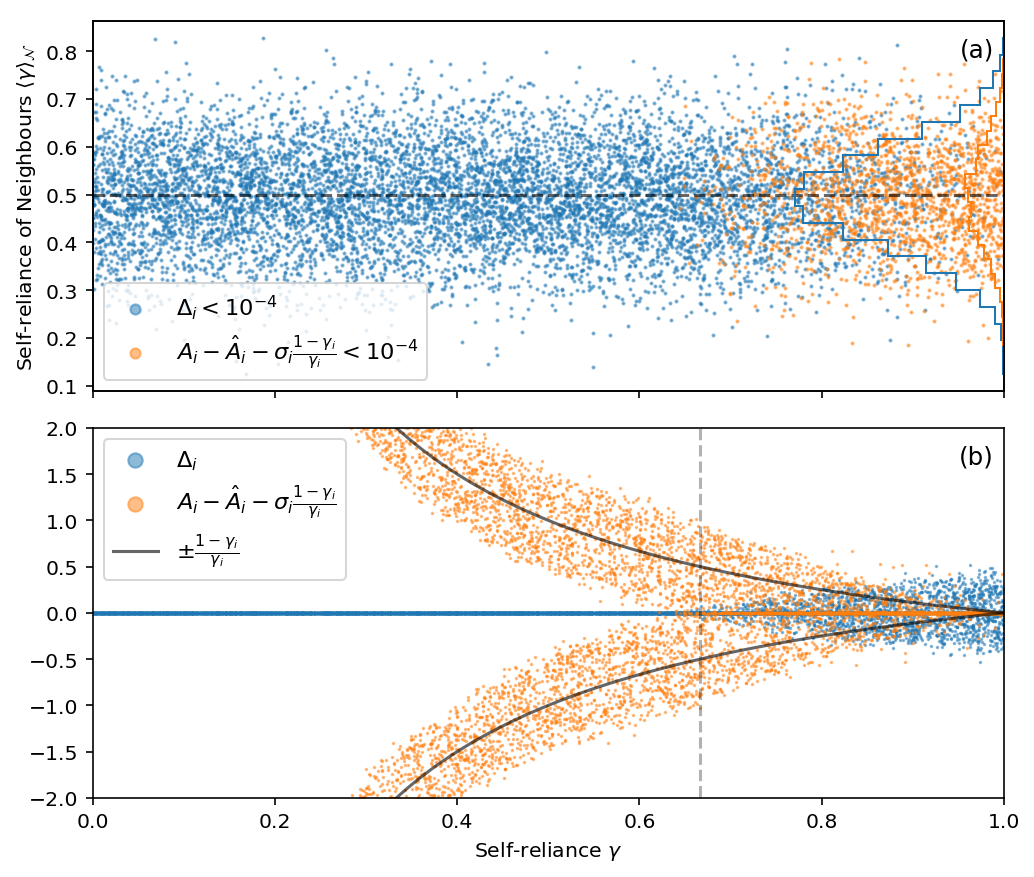

In [113]:
gamma_nn = np.array([gamma[neighbours_idx(100, j)].mean() for j in range(gamma.size)])

# visualize
###########
plt.rcParams.update({"figure.dpi": 147})
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 7), sharex=True)

# scatter
ax2.scatter(gamma, eq_delta, marker="o", s=0.5, alpha=0.5, label=r"$\Delta_i$")
ax2.scatter(gamma, eq_d2, marker="o", s=0.5, alpha=0.5, label=r"$A_i - \hat{A}_i - \sigma_i \frac{1-\gamma_i}{\gamma_i}$")
ax2.plot([2/3, 2/3], [-5, 5], color="black", linestyle="--", alpha=0.3)

x = np.linspace(0.1, 1.0, 100)
ax2.plot(x, (1-x)/x, color="black", alpha=0.6, label=r"$\pm \frac{1-\gamma_i}{\gamma_i}$")
ax2.plot(x, -(1-x)/x, color="black", alpha=0.6)
ax2.set_ylim([-2, 2])

ax2.legend(fontsize=11, markerscale=10)
ax2.set_xlabel(r"Self-reliance $\gamma$")
ax2.set_ylabel(r"")
ax2.set_xlim([0, 1])

# histogram
c1 = np.abs(eq_delta) < 1e-3
c2 = np.abs(eq_d2) < 1e-3
c3 = np.logical_not(np.logical_or(c1, c2))

bins = np.linspace(0, 1, 21)
#ax1.hist([gamma[c1], gamma[c2]], histtype="bar", density=True, stacked=True, bins=bins, alpha=0.6, 
#    label=[r"$\Delta_i < 10^{-4}$", r"$A_i - \hat{A}_i - \sigma_i \frac{1-\gamma_i}{\gamma_i} < 10^{-4}$"])


ax1.scatter(gamma[c1], gamma_nn[c1], marker="o", s=1., alpha=.5, c="tab:blue", label=r"$\Delta_i < 10^{-4}$")
ax1.scatter(gamma[c2], gamma_nn[c2], marker="o", s=1., alpha=.5, c="tab:orange", label=r"$A_i - \hat{A}_i - \sigma_i \frac{1-\gamma_i}{\gamma_i} < 10^{-4}$")

ax1.plot([0,1],[0.5,0.5],linestyle="--",alpha=0.6,color="black")
ax1.legend(fontsize=11, loc="lower left", markerscale=5)

ax1.set_ylabel(r"Self-reliance of Neighbours $\langle \gamma \rangle_{\mathcal{N}}$")

ax1.set_title("(a)", x=0.97, y=.87)
ax2.set_title("(b)", x=0.97, y=0.87)


ax3 = ax1.twiny()
ax3.set_xlim(ax3.get_xlim()[::-1])

factor = 2e-4

(counts, bins) = np.histogram(gamma_nn[c1], bins=20)
ax3.hist(bins[:-1], bins, weights=factor*counts, orientation="horizontal", histtype="step")

(counts, bins) = np.histogram(gamma_nn[c2], bins=20)
ax3.hist(bins[:-1], bins, weights=factor*counts, orientation="horizontal", histtype="step")


#move ticks to the right
ax3.yaxis.tick_right()
ax3.set_xticks([])

plt.subplots_adjust(hspace=0.1)

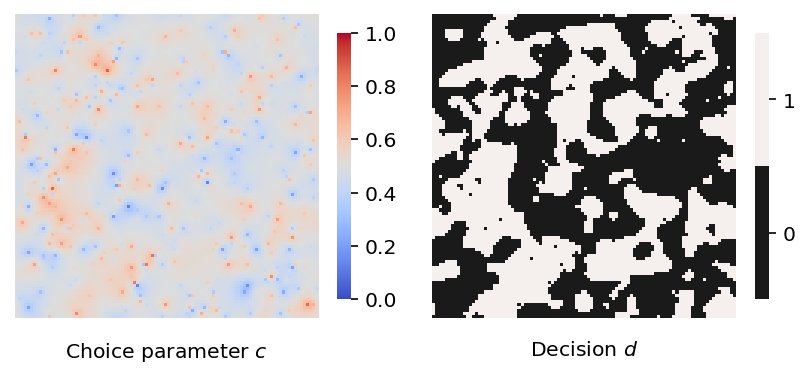

In [70]:
import os

location = "..\data\paramstest"
file = "agent_data_beta-avantgarde_mode-0.50_concentration-5.0.csv"

data = LoadSimulation(os.path.join(location, file), columns=["step", "id", "seed", "affinity", "avantgarde", "affinityGoal"])
eq_data = data.query("step == 100").query("seed == 101")

ShowState(eq_data.get("affinity").values)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from AvantgardeModelUtils import *

file_uniform = "../data/control/agent_data_uni.csv"
data = LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal"])

eq_data = data.query("step == 2_000")
A = eq_data["affinity"].values
Annm = np.array([A[neighbours_idx(100, j)].mean() for j in range(A.size)])
eq_delta = Annm - A
Ahat = eq_data["affinityGoal"].values
gamma = eq_data["avantgarde"].values
gamma_term = (1-gamma) / gamma * np.sign(eq_delta)
eq_d2 = A - Ahat - gamma_term

In [10]:
#################
# helpers
def index_to_crds(index, Nx):
    coords = np.zeros(2, dtype='int32')
    coords[1] = int(index % Nx)
    coords[0] = int(index / Nx)
    return coords

def crds_to_index(coords, Nx):
    return int(coords[0] * Nx + coords[1])

def get_neighbour_crds(i, j, Nx, Ny, r=1):
    """
    Returns the list of neighboring indices for a cell at position (i, j)
    in a 2D grid with periodic boundary conditions and dimensions Nx x Ny.
    """
    di_values = list(range(-r, r+1))
    dj_values = list(range(-r, r+1))
    neighbours = [((i+di) % Nx, (j+dj) % Ny)
                 for di in di_values
                 for dj in dj_values
                 if di != 0 or dj != 0]
    return neighbours

def map_index_to_neighbours(idx, N, r=1):
    return [crds_to_index(crd, N) for crd in get_neighbour_crds(*index_to_crds(idx, N), N, N, r=r)]
    

index_mapping = np.array([map_index_to_neighbours(k, 100) for k in range(10_000)])
index_to_ids_mapping = index_mapping + 1

def map_ids(ids):
    # to index
    indices = ids - 1
    mapped = index_to_ids_mapping[indices]
    return mapped


In [23]:
map_ids(np.array([1, 2]))

array([[10000,  9901,  9902,   100,     2,   200,   101,   102],
       [ 9901,  9902,  9903,     1,     3,   101,   102,   103]])

In [ ]:
## density of interfaces
sample = data_uniform.query("seed == 100").query("step == 100")
sample
np.unique(data_uniform["step"])

In [122]:
attitudes = np.genfromtxt(f'../data/uniform/data_A_seed{100}.csv', delimiter=' ')
attitudes = np.append(attitudes, data_uniform.query("seed == 100").query("step==1_000").get("affinity").values)

In [131]:
attitudes = np.genfromtxt('../data/uniform/data_A_seed101.csv', delimiter=' ')

all_attitudes = []
seeds = np.arange(100, 129)
for seed in seeds:
    attitudes = np.genfromtxt(f'../data/uniform/data_A_seed{seed}.csv', delimiter=' ')
    #attitudes = np.append(attitudes, data_uniform.query("seed==@seed").query("step==1_000").get("affinity").values)
    #attitudes = np.append(attitudes, data_uniform.query("seed==@seed").query("step==2_000").get("affinity").values)
    all_attitudes.append(attitudes)

In [164]:
from BlockNNClustering import *
from dataclasses import dataclass
        
def fragmentation(array):
    decision_grid = np.array(array.reshape(100, 100) >= 0.5, dtype="int")
    
    my_clustering = BlockNNClustering(min_cluster_size=1)
    _, labels = my_clustering.fit(decision_grid)

    unique_labels_, counts_ = np.unique(labels, return_counts=True)
    noise_count_ = counts_[unique_labels_ == -1][0] if -1 in unique_labels_ else 0
    sizes_ = counts_[unique_labels_ >= 0]
    n_clusters = sizes_.size
    n_agents = np.sum(counts_[unique_labels_ >= -1])
    if n_agents <= 1: return -1
    return (n_agents - (n_clusters + noise_count_)) / (n_agents - 1)

(0.2, 0.24)

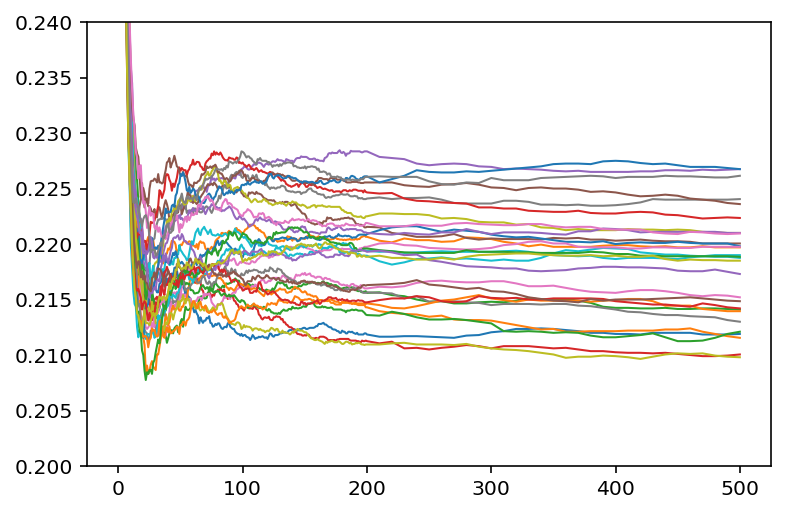

In [132]:
def density_of_interfaces(array):
    return np.logical_xor(array[index_mapping] >= 0.5, np.tile(array >= 0.5, (8,1)).transpose()).sum() / (8 * array.size)
    

def magnetisation(array):
    return (np.sum(array >= 0.5) - np.sum(array < 0.5)) / array.size

tt = np.arange(0, 200)
tt = np.append(tt, np.arange(200, 501, 10))

for attitudes in all_attitudes:
    doif = [density_of_interfaces(aa) for aa in attitudes[:231]]
    
    #print()
    m = magnetisation(attitudes[0])
    
    plt.plot(tt, doif, label=f"{m}")
    
plt.ylim([0.2, 0.24])
#plt.legend(loc="best")

In [133]:
rhos = np.array([[density_of_interfaces(aai) for aai in aa] for aa in all_attitudes]).transpose()

In [242]:
phis = np.array([[fragmentation(aai) for aai in aa] for aa in all_attitudes]).transpose()

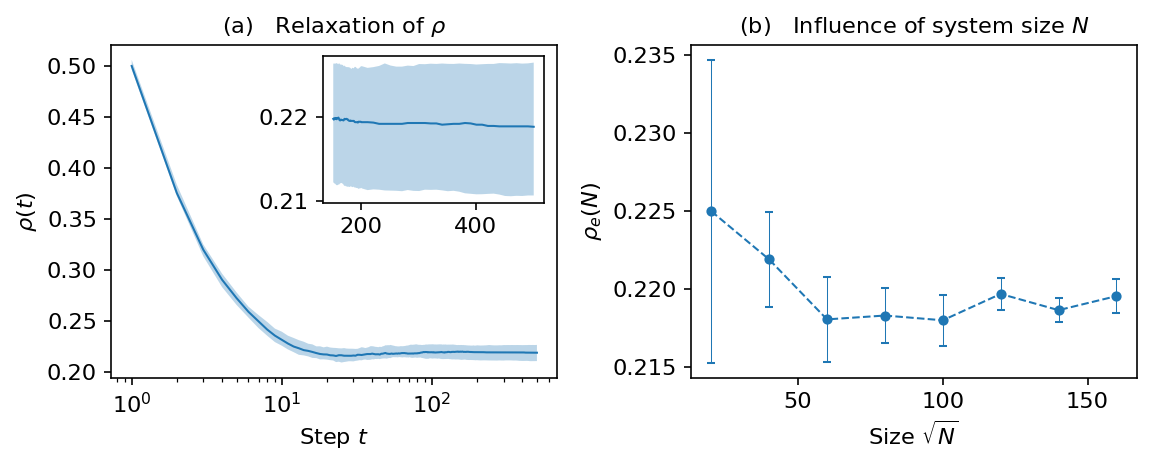

In [150]:
plt.rcParams.update({"figure.dpi": 147, "font.size": 11})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

y = np.median(rhos, axis=1)
y5 = np.percentile(rhos, 5, axis=1)
y95 = np.percentile(rhos, 95, axis=1)
ax1.fill_between(tt + 1, y5, y95, alpha=0.3)
ax1.plot(tt + 1, y, linestyle="-")
ax1.set_xscale("log")

axins = inset_axes(ax1, width=1.5, height=1., loc='upper left', 
                   bbox_to_anchor=(0.45, 0.6, 0.0, 0.4), bbox_transform=ax1.transAxes)

axins.plot(tt[150:] + 1, y[150:], linestyle="-")
axins.fill_between(tt[150:] + 1, y5[150:], y95[150:], alpha=0.3)


grouped = df.groupby("size")["rho"]
agg_data = grouped.agg([np.mean, np.std])

style = {"ms": 4, "capsize": 2, "elinewidth": 0.5}
ax2.errorbar(agg_data.index, agg_data["mean"].values, yerr=agg_data["std"] / np.sqrt(10), 
             marker="o", linestyle="--", **style)

#y = np.median(phis, axis=1)
#y5 = np.percentile(phis, 5, axis=1)
#y95 = np.percentile(phis, 95, axis=1)
#ax2.fill_between(tt + 1, y5, y95, alpha=0.3)
#ax2.plot(tt + 1, y, linestyle="-")
#ax2.set_xscale("log")

#axins = inset_axes(ax2, width=1.5, height=1., loc='upper left', 
#                   bbox_to_anchor=(0.45, 0.25, 0.0, 0.4), bbox_transform=ax2.transAxes)

#axins.plot(tt[150:] + 1, y[150:], linestyle="-")
#axins.fill_between(tt[150:] + 1, y5[150:], y95[150:], alpha=0.3)

ax1.set_xlabel(r"Step $t$")
ax2.set_xlabel(r"Size $\sqrt{N}$")
ax1.set_ylabel(r"$\rho(t)$")
ax2.set_ylabel(r"$\rho_e(N)$")

ax1.set_title(r"(a)   Relaxation of $\rho$", fontsize=11)
ax2.set_title(r"(b)   Influence of system size $N$", fontsize=11)

plt.subplots_adjust(wspace=0.3)

In [247]:
ms = np.array([[magnetisation(aai) for aai in aa] for aa in all_attitudes]).transpose()

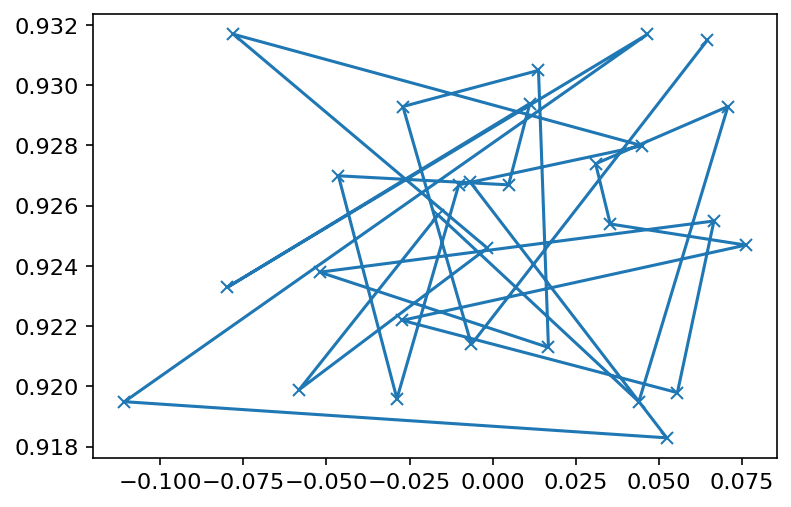

In [254]:
plt.plot(ms[-1], phis[-1], marker="x")

In [261]:
### Correlation
##################
from scipy import stats

rhos_eq = rhos[-1]
phis_eq = phis[-1]
m_eq = ms[-1]

print("Pearson correlation (rho, m):")
print(np.corrcoef(rhos_eq, m_eq, rowvar=False))
print("Pearson correlation (phi, m):")
print(np.corrcoef(phis_eq, m_eq, rowvar=False))

x = m_eq
y = rhos_eq
def statistic(x):  # permute only `x`
    return stats.spearmanr(x, y).statistic

res_exact = stats.permutation_test((x,), statistic,
                                   permutation_type='pairings')

res_asymptotic = stats.spearmanr(x, y)
print(res_asymptotic)
res_exact.pvalue, res_asymptotic.pvalue  # asymptotic pvalue is too low

x = m_eq
y = phis_eq
def statistic(x):  # permute only `x`
    return stats.spearmanr(x, y).statistic

res_exact = stats.permutation_test((x,), statistic,
                                   permutation_type='pairings')

res_asymptotic = stats.spearmanr(x, y)
print(res_asymptotic)
res_exact.pvalue, res_asymptotic.pvalue  # asymptotic pvalue is too low

Pearson correlation (rho, m):
[[ 1.         -0.15328721]
 [-0.15328721  1.        ]]
Pearson correlation (phi, m):
[[1.         0.17945981]
 [0.17945981 1.        ]]
SignificanceResult(statistic=-0.1717171769284666, pvalue=0.3730949947061629)
SignificanceResult(statistic=0.16683097146950554, pvalue=0.38705050833513166)


(0.382, 0.38705050833513166)

In [263]:
### Correlation
##################
from scipy import stats

rhos_eq = rhos[-1]
phis_eq = phis[-1]
m_eq = ms[0]

print("Pearson correlation (rho, m):")
print(np.corrcoef(rhos_eq, m_eq, rowvar=False))
print("Pearson correlation (phi, m):")
print(np.corrcoef(phis_eq, m_eq, rowvar=False))

x = m_eq
y = rhos_eq
def statistic(x):  # permute only `x`
    return stats.spearmanr(x, y).statistic

res_exact = stats.permutation_test((x,), statistic,
                                   permutation_type='pairings')

res_asymptotic = stats.spearmanr(x, y)
print(res_asymptotic)
print(res_exact.pvalue)
res_asymptotic.pvalue  # asymptotic pvalue is too low

x = m_eq
y = phis_eq
def statistic(x):  # permute only `x`
    return stats.spearmanr(x, y).statistic

res_exact = stats.permutation_test((x,), statistic,
                                   permutation_type='pairings')

res_asymptotic = stats.spearmanr(x, y)
print(res_asymptotic)
res_exact.pvalue, res_asymptotic.pvalue  # asymptotic pvalue is too low

Pearson correlation (rho, m):
[[1.         0.12972216]
 [0.12972216 1.        ]]
Pearson correlation (phi, m):
[[ 1.         -0.03302137]
 [-0.03302137  1.        ]]
SignificanceResult(statistic=0.15195958065764675, pvalue=0.4313301406189781)
0.435
SignificanceResult(statistic=-0.062499999999999986, pvalue=0.7473898660140268)


(0.7328, 0.7473898660140268)

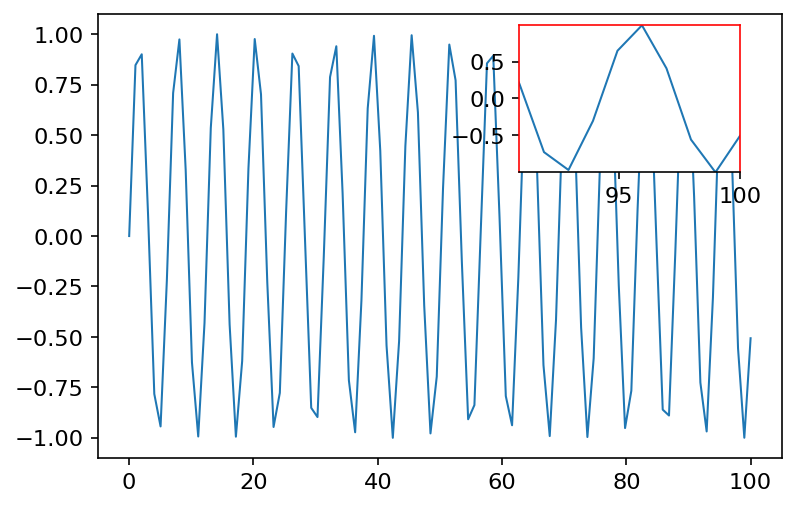

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Generate sample data
x = np.linspace(0, 100, 100)
y = np.sin(x)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, y, label='Sine wave')

# Create the inset_axes instance and specify the position, size, and zoom level
axins = inset_axes(ax, width=1.5, height=1., loc='upper left', bbox_to_anchor=(0.6, 0.6, 0.0, 0.4), bbox_transform=ax.transAxes)

# Plot the same data on the inset_axes
axins.plot(x, y)

# Set the limits of the x-axis for the zoomed-in panel (last 10 x values)
axins.set_xlim(x[-10], x[-1])

# Optionally, set the limits of the y-axis for the zoomed-in panel
axins.set_ylim(np.min(y[-10:]), np.max(y[-10:]))

# Optionally, set the ticks for the x and y axes in the zoomed-in panel
#axins.xaxis.set_ticks(np.arange(x[-10], x[-1]+1, 1))
#axins.yaxis.set_ticks(np.arange(round(np.min(y[-10:]), 2), round(np.max(y[-10:]), 2)+0.01, 0.1))

# Optionally, add a border around the zoomed-in panel
axins.spines['bottom'].set_color('black')
axins.spines['top'].set_color('red')
axins.spines['left'].set_color('red')
axins.spines['right'].set_color('red')

plt.show()


In [56]:
a0[index_mapping] >= 0.5

array([[False,  True,  True, ...,  True, False,  True],
       [ True,  True, False, ..., False,  True,  True],
       [ True, False, False, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [48]:
a0 >= 0.5

array([ True,  True,  True, ...,  True,  True, False])

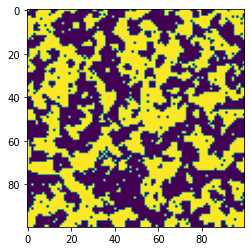

In [79]:
plt.imshow(attitudes[100].reshape(100, 100)>=0.5)

In [87]:
a = np.array([False])
b = np.array([True])
np.logical_xor(a, b)

array([ True])

In [111]:
data

,step,id,affinity,avantgarde,affinityGoal
0,0,1,0.660911,0.260125,0.190313
1,0,2,0.645691,0.067193,0.967600
2,0,3,0.972755,0.545968,0.526845
3,0,4,0.523990,0.868194,0.172707
4,0,5,0.199381,0.557837,0.893169
...,...,...,...,...,...
209995,2000,9996,0.442335,0.546545,0.231977
209996,2000,9997,0.453633,0.229368,0.247023
209997,2000,9998,0.498617,0.685058,0.530775
209998,2000,9999,0.517880,0.590378,0.821052


In [115]:
file_uniform = "../data/distributions/agent_data_1000steps.csv"
data_uniform = LoadSimulation(file_uniform, columns=["step", "id", "affinity", "avantgarde", "affinityGoal", "seed"])

In [119]:
data_uniform.query("step==1000")

,step,id,affinity,avantgarde,affinityGoal,seed
10000,1000,1,0.537423,0.260125,0.190313,100
10001,1000,2,0.581093,0.067193,0.967600,100
10002,1000,3,0.553466,0.545968,0.526845,100
10003,1000,4,0.324524,0.868194,0.172707,100
10004,1000,5,0.477360,0.557837,0.893169,100
...,...,...,...,...,...,...
2019995,1000,9996,0.472080,0.817793,0.683931,200
2019996,1000,9997,0.460757,0.129224,0.175064,200
2019997,1000,9998,0.455586,0.706168,0.819178,200
2019998,1000,9999,0.444962,0.396587,0.799024,200
